In [7]:
pwd

'/users/k1926552/Documents/FINAL/netpyne-project/KonstantoudakiEtAl2014/experiment'

In [1]:
from netpyne import specs, sim

In [2]:
netParams = specs.NetParams()  # object of class NetParams to store the network parameters
simConfig = specs.SimConfig()

In [3]:
netParams.importCellParams(
        label='PYR',
        conds={'cellType': 'PYR', 'cellModel': 'PYR_cell'},
        fileName='pfc_pc_temp.hoc',
        cellName='Pcell',
        importSynMechs=True)
netParams.cellParams.PYR.secs.soma.mechs.pas.e = -66

netParams.importCellParams(
        label='FSin',
        conds={'cellType': 'FSin', 'cellModel': 'FS_cell'},
        fileName='incell.hoc',
        cellName='INcell',
        importSynMechs=True)
netParams.cellParams.FSin.secs.soma.mechs.pas.e = -73

netParams.importCellParams(
        label='RSin',
        conds={'cellType': 'RSin', 'cellModel': 'RS_cell'},
        fileName='cb.hoc',
        cellName='CBcell',
        importSynMechs=True)
netParams.cellParams.RSin.secs.soma.mechs.pas.e = -64

netParams.importCellParams(
        label='ISin',
        conds={'cellType': 'ISin', 'cellModel': 'IS_cell'},
        fileName='cr.hoc',
        cellName='CRcell',
        importSynMechs=True)
netParams.cellParams.ISin.secs.soma.mechs.pas.e = -70


	1 
Balancing each compartment to -65 mV
	1 
Balancing each compartment to -73 mV
	1 
Balancing each compartment to -64 mV
	1 
Balancing each compartment to -70 mV


In [4]:
netParams.popParams['P'] = {'cellModel': 'PYR_cell', 'cellType': 'PYR',  'numCells': 1}
netParams.popParams['F'] = {'cellModel': 'FS_cell', 'cellType': 'FSin',  'numCells': 1}
netParams.popParams['R'] = {'cellModel': 'RS_cell', 'cellType': 'RSin',  'numCells': 1}
netParams.popParams['I'] = {'cellModel': 'IS_cell', 'cellType': 'ISin',  'numCells': 1}

In [5]:
simConfig.hParams['celsius'] = 23
simConfig.allowSelfConns = False
simConfig.duration = 1000
simConfig.dt = 0.025
simConfig.verbose = False
simConfig.recordTraces = {'V_soma': {'sec': 'soma', 'loc': 0.5, 'var': 'v'}}
# simConfig.recordStep = 1
simConfig.savePickle = False
simConfig.analysis['plotTraces'] = {'include': [('P', [0]), ('F', [0]), ('R', [0]), ('I', [0])],
                                    'oneFigPer': 'trace', 'overlay': False}


Start time:  2021-05-29 11:14:24.136280

Creating network of 4 cell populations on 1 hosts...
  Number of cells on node 0: 4 
  Done; cell creation time = 0.02 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
  Number of stims on node 0: 0 
  Done; cell stims creation time = 0.00 s.
Recording 4 traces of 1 types on node 0

Running simulation for 1000.0 ms...
  Done; run time = 3.35 s; real-time ratio: 0.30.

Gathering data...
  Done; gather time = 0.00 s.

Analyzing...
  Cells: 4
  Connections: 0 (0.00 per cell)
  Spikes: 0 (0.00 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 3.35 s
  Done; saving time = 0.02 s.
Plotting recorded cell traces ... trace


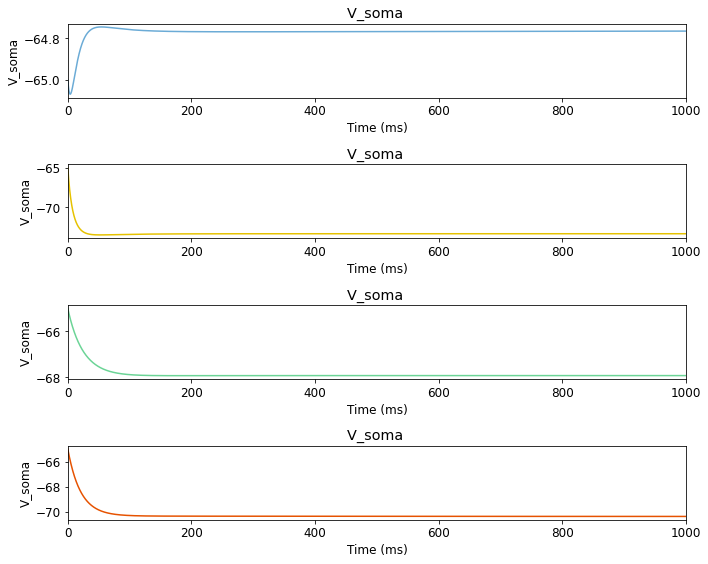

  Done; plotting time = 0.48 s

Total time = 3.88 s

End time:  2021-05-29 11:14:28.018640


In [6]:
sim.createSimulateAnalyze(netParams=netParams, simConfig=simConfig)

In [ ]:
simConfig.analysis['plotTraces'] = {'include': [('P', [0]), ('F', [0]), ('R', [0]), ('I', [0])],
                                    'oneFigPer': 'trace', 'overlay': False}

In [ ]:
netParams.stimSourceParams['Input_1'] = {'type': 'IClamp', 'del': 300, 'dur': 100, 'amp': 0}
netParams.stimTargetParams['Input_1->S'] = {'source': 'Input_1', 'sec':'soma', 'loc': 0.8, 'conds': {'pop':'F'}}


In [12]:
netParams.synMechParams['AMPA'] = {'mod': 'GLU'}
netParams.synMechParams['AMPAIN'] = {'mod': 'GLUIN'}
netParams.synMechParams['GABAA'] = {'mod': 'GABAa'}
netParams.synMechParams['GABAIN'] = {'mod': 'GABAain'}
netParams.synMechParams['NMDA'] = {'mod': 'NMDA'}
netParams.synMechParams['NMDAIN'] = {'mod': 'NMDAIN'}
netParams.synMechParams['GABAB'] = {'mod': 'GABAb'}